In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
train=pd.read_csv("/kaggle/input/titanic/train.csv")
test=pd.read_csv("/kaggle/input/titanic/test.csv")

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#first i wanna ask question to my dataset that which column would be contributing me in the project or which are complegtely waste 
#also we would be simultaneously handling our both test and train dataset


In [5]:
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


In [6]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [8]:
#in both the colums we could see that cabin has lost majority of data so we would be dropping it from both the dataset
#even passanger id does not make
# Save PassengerId for submission
passenger_id = test['PassengerId']

# Drop unnecessary columns
train = train.drop(columns=['Cabin', 'PassengerId'])
test  = test.drop(columns=['Cabin', 'PassengerId'])


In [9]:
#for age replacement, i am thinking about assigning age according to 
train.groupby('Sex')['Age'].mean()

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

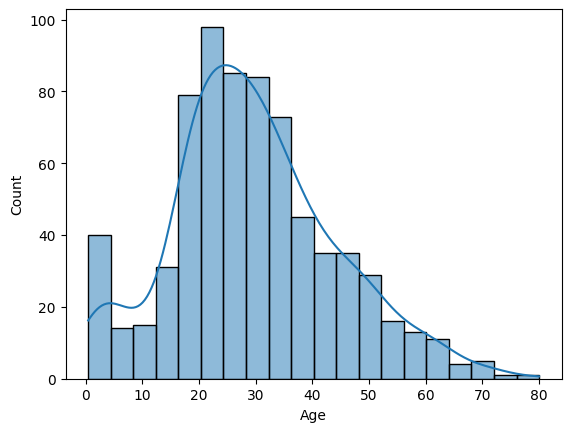

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(train['Age'].dropna(),kde=True)
plt.show()

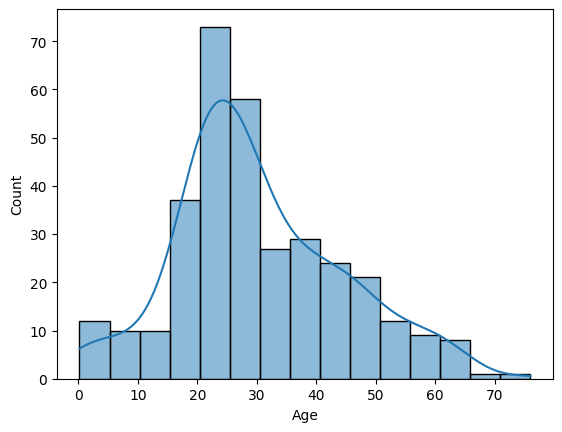

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(test['Age'].dropna(),kde=True)
plt.show()

In [12]:
# both have skewed graph,so median filling would be more prefered
train['Age'] = train['Age'].fillna(
    train.groupby('Sex')['Age'].transform('median')
)
train['Embarked']=train['Embarked'].fillna(train['Embarked'].mode()[0])

In [13]:
train.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [14]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [15]:
test['Age'] = test['Age'].fillna(
    train.groupby('Sex')['Age'].transform('median')
)
# for fare checking his pclass would be beneficial and providing would be more beneficial
test['Fare'] = test['Fare'].fillna(
    test.groupby('Pclass')['Fare'].transform('median')
)



In [16]:
test.isnull().sum()

Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [17]:
# I guess i should combine sibsp and parch column
train['total_mem']=train['SibSp']+train['Parch']+1
test['total_mem']=test['SibSp']+test['Parch']+1
train=train.drop(columns=['SibSp','Parch'])
test=test.drop(columns=['SibSp','Parch'])



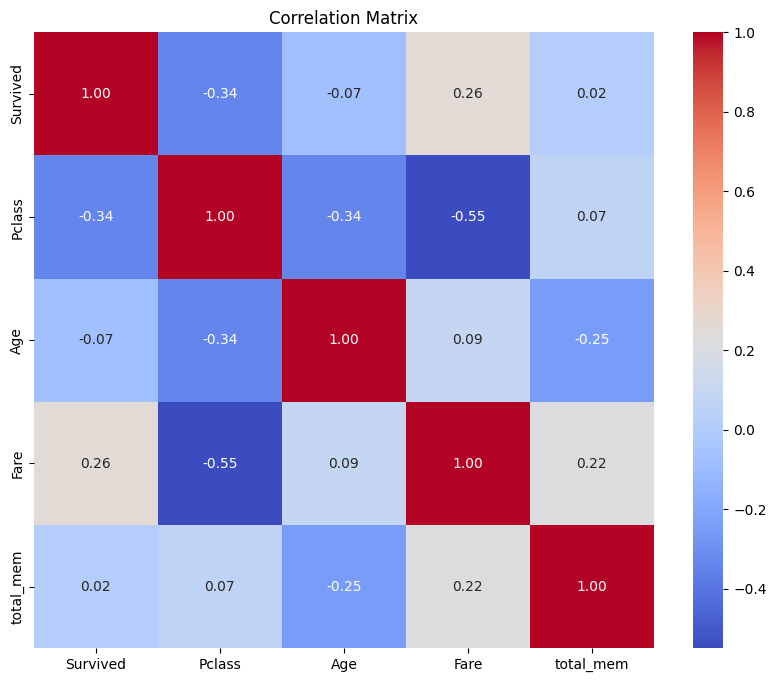

In [18]:
# data cleaning is done now we would rather focus on EDTA
#lets analyse each column and see if we could get anything out of them
# lets check corelation b/w them(corelation only work on numerical data only)
import matplotlib.pyplot as plt
import seaborn as sns

# select numerical columns
train_num = train.select_dtypes(include='number')

# correlation matrix
corr = train_num.corr()

# plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


In [19]:
train.head(2)

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,total_mem
0,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,S,2
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C,2


In [20]:
#Now we know that computer does not understand catagorical data,so we need to convert into numerical data
#we would be using one hot encoding,or would be performing some python operation to get things out of the text

In [21]:
#i wanna extract the title to check the pattern
def extract_title(name):
    return name.strip().split(',')[1].split('.')[0].strip()



In [22]:
train['Title'] = train['Name'].apply(extract_title)
test['Title']  = test['Name'].apply(extract_title)


In [23]:
train.head(5)

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,total_mem,Title
0,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,S,2,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C,2,Mrs
2,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,S,1,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,S,2,Mrs
4,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,S,1,Mr


In [24]:
train.groupby('Sex')['Survived'].mean()
# wow as always men dies faster than women

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [25]:
#so now i would be using 
train['Title'].value_counts()

Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Mlle              2
Major             2
Ms                1
Mme               1
Don               1
Lady              1
Sir               1
Capt              1
the Countess      1
Jonkheer          1
Name: count, dtype: int64

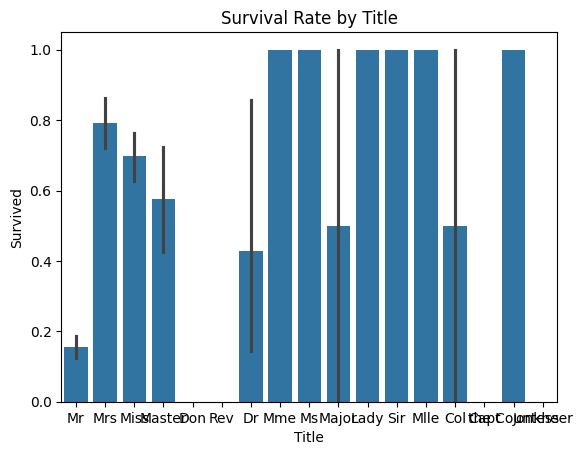

In [26]:
sns.barplot(x='Title', y='Survived', data=train)
plt.title('Survival Rate by Title')
plt.show()
#people with male title are not surviving much

In [27]:
train.groupby('Pclass')['Survived'].mean()
# AS ALWAYS RICH PEOPLE ARE GIVEN MORE PRIORITY

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [28]:
#Gender (Mr vs Mrs vs Miss)
#Age proxy (Master = child)
#Social status (Dr, Rev, Sir)
#Cultural survival bias (women & children first)

In [29]:
train=train.drop(columns=['Name','Ticket'])
test=test.drop(columns=['Name','Ticket'])

In [30]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,total_mem,Title
0,0,3,male,22.0,7.2500,S,2,Mr
1,1,1,female,38.0,71.2833,C,2,Mrs
2,1,3,female,26.0,7.9250,S,1,Miss
3,1,1,female,35.0,53.1000,S,2,Mrs
4,0,3,male,35.0,8.0500,S,1,Mr


In [31]:
train.groupby('total_mem')['Survived'].mean()
#insight from this -
#Alone    → low survival(1)
#Small    → high survival(2-4)
#Large    → low survival(5-11)


total_mem
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: Survived, dtype: float64

In [32]:
#so lets create a function that would generalise total member column more 
def total_surv(col):
    if(col['total_mem']==1 or col['total_mem']>=5):
        return 0
    else:
        return 1

In [33]:
train['total_mem']=train.apply(total_surv,axis=1)
test['total_mem']=test.apply(total_surv,axis=1)


In [34]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,total_mem,Title
0,0,3,male,22.0,7.2500,S,1,Mr
1,1,1,female,38.0,71.2833,C,1,Mrs
2,1,3,female,26.0,7.9250,S,0,Miss
3,1,1,female,35.0,53.1000,S,1,Mrs
4,0,3,male,35.0,8.0500,S,0,Mr


In [35]:
train.groupby('Title')['Survived'].mean()

Title
Capt            0.000000
Col             0.500000
Don             0.000000
Dr              0.428571
Jonkheer        0.000000
Lady            1.000000
Major           0.500000
Master          0.575000
Miss            0.697802
Mlle            1.000000
Mme             1.000000
Mr              0.156673
Mrs             0.792000
Ms              1.000000
Rev             0.000000
Sir             1.000000
the Countess    1.000000
Name: Survived, dtype: float64

In [36]:
def transform_title(title):
    if title == 'Mr':
        return 'Man'
    
    elif title in ['Miss', 'Ms', 'Mlle']:
        return 'Woman'
    
    elif title in ['Mrs', 'Mme']:
        return 'Woman_Married'
    
    elif title == 'Master':
        return 'Child'
    
    else:
        return 'Elite'


In [37]:
train['Title_Group'] = train['Title'].apply(transform_title)
test['Title_Group']  = test['Title'].apply(transform_title)


In [38]:
train.head(2)

,Survived,Pclass,Sex,Age,Fare,Embarked,total_mem,Title,Title_Group
0,0,3,male,22.0,7.2500,S,1,Mr,Man
1,1,1,female,38.0,71.2833,C,1,Mrs,Woman_Married


In [39]:
cat_cols = ['Sex', 'Embarked', 'Title_Group']

train = pd.get_dummies(train, columns=cat_cols, drop_first=True)
test  = pd.get_dummies(test, columns=cat_cols, drop_first=True)

# convert ONLY boolean columns to int
bool_cols = train.select_dtypes(include='bool').columns
train[bool_cols] = train[bool_cols].astype(int)
test[bool_cols]  = test[bool_cols].astype(int)


In [40]:
train=train.drop(columns=['Title'])
test=test.drop(columns=['Title'])

In [41]:
train.head()

,Survived,Pclass,Age,Fare,total_mem,Sex_male,Embarked_Q,Embarked_S,Title_Group_Elite,Title_Group_Man,Title_Group_Woman,Title_Group_Woman_Married
0,0,3,22.0,7.2500,1,1,0,1,0,1,0,0
1,1,1,38.0,71.2833,1,0,0,0,0,0,0,1
2,1,3,26.0,7.9250,0,0,0,1,0,0,1,0
3,1,1,35.0,53.1000,1,0,0,1,0,0,0,1
4,0,3,35.0,8.0500,0,1,0,1,0,1,0,0


In [42]:
from sklearn.preprocessing import StandardScaler

num_cols = ['Age', 'Fare']
scaler = StandardScaler()

train[num_cols] = scaler.fit_transform(train[num_cols])
test[num_cols]  = scaler.transform(test[num_cols])


In [43]:
train.head(2)

,Survived,Pclass,Age,Fare,total_mem,Sex_male,Embarked_Q,Embarked_S,Title_Group_Elite,Title_Group_Man,Title_Group_Woman,Title_Group_Woman_Married
0,0,3,-0.571902,-0.502445,1,1,0,1,0,1,0,0
1,1,1,0.657785,0.786845,1,0,0,0,0,0,0,1


In [44]:
test.head(2)

,Pclass,Age,Fare,total_mem,Sex_male,Embarked_Q,Embarked_S,Title_Group_Elite,Title_Group_Man,Title_Group_Woman,Title_Group_Woman_Married
0,3,0.388791,-0.490783,0,1,1,0,0,1,0,0
1,3,1.349484,-0.507479,1,0,0,1,0,0,0,1


In [45]:
train_backup=train.copy()
X_train=train_backup.drop(columns=['Survived'])
Y_train=train['Survived']

In [46]:
X_train.head(5)

,Pclass,Age,Fare,total_mem,Sex_male,Embarked_Q,Embarked_S,Title_Group_Elite,Title_Group_Man,Title_Group_Woman,Title_Group_Woman_Married
0,3,-0.571902,-0.502445,1,1,0,1,0,1,0,0
1,1,0.657785,0.786845,1,0,0,0,0,0,0,1
2,3,-0.264480,-0.488854,0,0,0,1,0,0,1,0
3,1,0.427219,0.420730,1,0,0,1,0,0,0,1
4,3,0.427219,-0.486337,0,1,0,1,0,1,0,0


In [47]:
Y_train.head(5)

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

In [49]:
from sklearn.model_selection import cross_val_score

for name, model in models.items():
    cv_score = cross_val_score(model, X_train, Y_train, cv=5).mean()
    print(f"{name}: {cv_score:.4f}")


Logistic Regression: 0.8014
KNN: 0.8148
SVM: 0.8294
Naive Bayes: 0.7789
Decision Tree: 0.7778
Random Forest: 0.8126
Gradient Boosting: 0.8339


In [50]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 4],
    'subsample': [0.8, 1.0]
}

gb = GradientBoostingClassifier(random_state=42)

grid = GridSearchCV(
    gb,
    param_grid,
    cv=5,
    scoring='accuracy'
)

grid.fit(X_train, Y_train)

grid.best_params_, grid.best_score_


({'learning_rate': 0.05,
  'max_depth': 4,
  'n_estimators': 200,
  'subsample': 1.0},
 np.float64(0.8439959826752872))

In [51]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_knn = GridSearchCV(
    knn,
    param_grid_knn,
    cv=5,
    scoring='accuracy'
)

grid_knn.fit(X_train, Y_train)

print("Best Params (KNN):", grid_knn.best_params_)
print("Best CV Score (KNN):", grid_knn.best_score_)


Best Params (KNN): {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'uniform'}
Best CV Score (KNN): 0.8238089259933463


In [52]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

svm = LinearSVC(max_iter=5000)

param_grid = {
    'C': [0.1, 1, 10]
}

grid_svm = GridSearchCV(
    svm,
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_svm.fit(X_train, Y_train)

print("Best Params:", grid_svm.best_params_)
print("Best Score:", grid_svm.best_score_)


Best Params: {'C': 1}
Best Score: 0.7946017199171427


In [53]:
final_gb = GradientBoostingClassifier(
    learning_rate=0.05,
    max_depth=4,
    n_estimators=200,
    subsample=1.0,
    random_state=42
)

final_gb.fit(X_train, Y_train)

y_pred = final_gb.predict(test)

In [54]:
submission = pd.DataFrame({
    'PassengerId': passenger_id,
    'Survived': y_pred
})

submission.to_csv('/kaggle/working/submission.csv', index=False)


In [55]:
import os
os.listdir('/kaggle/working/')


['__notebook__.ipynb', 'submission.csv']